In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [5]:
from weather_api import *

In [6]:
df = get_data("zakopane")

In [7]:
df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowa prędkość wiatru [m/s],Średnia dobowa temperatura [°C],Średnia dobowe ciśnienie pary wodnej [hPa],Średnia dobowa wilgotność względna [%],Średnia dobowe ciśnienie na poziomie stacji [hPa],Średnie dobowe ciśnienie na pozimie morza [hPa],Status pomiaru PPPM,Suma opadu dzień [mm],Suma opadu noc [mm]
0,349190625,ZAKOPANE,2020,1,1,4.3,2.0,-1.7,4.0,73.1,929.5,0.0,8,0.0,0.0
1,349190625,ZAKOPANE,2020,1,2,4.4,1.3,-1.5,3.1,56.8,928.8,0.0,8,0.0,0.0
2,349190625,ZAKOPANE,2020,1,3,2.5,1.4,-1.1,3.8,68.8,922.4,0.0,8,0.0,0.0
3,349190625,ZAKOPANE,2020,1,4,7.6,3.6,0.8,5.4,83.6,917.5,0.0,8,1.9,6.5
4,349190625,ZAKOPANE,2020,1,5,7.9,2.8,-4.1,3.8,83.6,924.4,0.0,8,3.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,349190625,ZAKOPANE,2019,12,27,7.9,2.1,-2.0,4.8,91.3,920.5,0.0,8,4.6,6.5
543,349190625,ZAKOPANE,2019,12,28,8.0,2.6,-4.6,4.0,90.6,928.0,0.0,8,3.7,0.4
544,349190625,ZAKOPANE,2019,12,29,7.1,0.9,-7.3,3.2,88.3,933.2,0.0,8,1.1,0.0
545,349190625,ZAKOPANE,2019,12,30,6.0,1.3,-2.3,4.8,87.5,931.0,0.0,8,0.0,0.0


In [8]:
def normalize_particular_columns(df, column_names):
    for col_name in column_names:
        df.iloc[:,col_name]=(df.iloc[:,col_name]-df.iloc[:,col_name].mean())/df.iloc[:,col_name].std()

In [9]:
value = []
data = df['Suma opadu dzień  [mm]']
data = data.to_numpy()
for row in data:
    if row == 0:
        value.append(0)
    elif row > 0:
        value.append(1)
df['deszcz w dzień']= value

value1 = []
data1 = df['Suma opadu noc   [mm]']
data1 = data1.to_numpy()
for row1 in data1:
    if row1 == 0:
        value1.append(0)
    elif row1 > 0:
        value1.append(1)
df['deszcz w nocy']= value

In [10]:
df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowa prędkość wiatru [m/s],Średnia dobowa temperatura [°C],Średnia dobowe ciśnienie pary wodnej [hPa],Średnia dobowa wilgotność względna [%],Średnia dobowe ciśnienie na poziomie stacji [hPa],Średnie dobowe ciśnienie na pozimie morza [hPa],Status pomiaru PPPM,Suma opadu dzień [mm],Suma opadu noc [mm],deszcz w dzień,deszcz w nocy
0,349190625,ZAKOPANE,2020,1,1,4.3,2.0,-1.7,4.0,73.1,929.5,0.0,8,0.0,0.0,0,0
1,349190625,ZAKOPANE,2020,1,2,4.4,1.3,-1.5,3.1,56.8,928.8,0.0,8,0.0,0.0,0,0
2,349190625,ZAKOPANE,2020,1,3,2.5,1.4,-1.1,3.8,68.8,922.4,0.0,8,0.0,0.0,0,0
3,349190625,ZAKOPANE,2020,1,4,7.6,3.6,0.8,5.4,83.6,917.5,0.0,8,1.9,6.5,1,1
4,349190625,ZAKOPANE,2020,1,5,7.9,2.8,-4.1,3.8,83.6,924.4,0.0,8,3.4,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,349190625,ZAKOPANE,2019,12,27,7.9,2.1,-2.0,4.8,91.3,920.5,0.0,8,4.6,6.5,1,1
543,349190625,ZAKOPANE,2019,12,28,8.0,2.6,-4.6,4.0,90.6,928.0,0.0,8,3.7,0.4,1,1
544,349190625,ZAKOPANE,2019,12,29,7.1,0.9,-7.3,3.2,88.3,933.2,0.0,8,1.1,0.0,1,1
545,349190625,ZAKOPANE,2019,12,30,6.0,1.3,-2.3,4.8,87.5,931.0,0.0,8,0.0,0.0,0,0


In [11]:
df = df.drop(df.columns[11],axis = 1)
df = df.drop(df.columns[11],axis = 1)

In [12]:
columns_to_normalize = [[5],[6],[7],[8],[9],[10]]
normalize_particular_columns(df, columns_to_normalize)

In [13]:
df

,Kod stacji,Nazwa stacji,Rok,Miesiąc,Dzień,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowa prędkość wiatru [m/s],Średnia dobowa temperatura [°C],Średnia dobowe ciśnienie pary wodnej [hPa],Średnia dobowa wilgotność względna [%],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Suma opadu noc [mm],deszcz w dzień,deszcz w nocy
0,349190625,ZAKOPANE,2020,1,1,-0.503961,0.381053,-1.115719,-0.959836,-0.113218,1.609431,0.0,0.0,0,0
1,349190625,ZAKOPANE,2020,1,2,-0.457023,-0.472693,-1.089057,-1.181264,-1.372368,1.516841,0.0,0.0,0,0
2,349190625,ZAKOPANE,2020,1,3,-1.348845,-0.350729,-1.035733,-1.009042,-0.445386,0.670304,0.0,0.0,0,0
3,349190625,ZAKOPANE,2020,1,4,1.044993,2.332472,-0.782441,-0.615393,0.697891,0.022174,1.9,6.5,1,1
4,349190625,ZAKOPANE,2020,1,5,1.185807,1.356762,-1.435666,-1.009042,0.697891,0.934847,3.4,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,349190625,ZAKOPANE,2019,12,27,1.185807,0.503017,-1.155713,-0.763011,1.292705,0.418988,4.6,6.5,1,1
543,349190625,ZAKOPANE,2019,12,28,1.232745,1.112835,-1.502322,-0.959836,1.238631,1.411024,3.7,0.4,1,1
544,349190625,ZAKOPANE,2019,12,29,0.810303,-0.960547,-1.862262,-1.156661,1.060959,2.098835,1.1,0.0,1,1
545,349190625,ZAKOPANE,2019,12,30,0.293985,-0.472693,-1.195706,-0.763011,0.999160,1.807838,0.0,0.0,0,0


In [14]:
date = pd.to_datetime((df['Rok']*10000+df['Miesiąc']*100+df['Dzień']).apply(str),format='%Y%m%d')
df.insert(loc=2, column='Data', value=date)
for i in range(0,3):
    df = df.drop(df.columns[3],axis = 1)
df

,Kod stacji,Nazwa stacji,Data,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowa prędkość wiatru [m/s],Średnia dobowa temperatura [°C],Średnia dobowe ciśnienie pary wodnej [hPa],Średnia dobowa wilgotność względna [%],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Suma opadu noc [mm],deszcz w dzień,deszcz w nocy
0,349190625,ZAKOPANE,2020-01-01,-0.503961,0.381053,-1.115719,-0.959836,-0.113218,1.609431,0.0,0.0,0,0
1,349190625,ZAKOPANE,2020-01-02,-0.457023,-0.472693,-1.089057,-1.181264,-1.372368,1.516841,0.0,0.0,0,0
2,349190625,ZAKOPANE,2020-01-03,-1.348845,-0.350729,-1.035733,-1.009042,-0.445386,0.670304,0.0,0.0,0,0
3,349190625,ZAKOPANE,2020-01-04,1.044993,2.332472,-0.782441,-0.615393,0.697891,0.022174,1.9,6.5,1,1
4,349190625,ZAKOPANE,2020-01-05,1.185807,1.356762,-1.435666,-1.009042,0.697891,0.934847,3.4,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,349190625,ZAKOPANE,2019-12-27,1.185807,0.503017,-1.155713,-0.763011,1.292705,0.418988,4.6,6.5,1,1
543,349190625,ZAKOPANE,2019-12-28,1.232745,1.112835,-1.502322,-0.959836,1.238631,1.411024,3.7,0.4,1,1
544,349190625,ZAKOPANE,2019-12-29,0.810303,-0.960547,-1.862262,-1.156661,1.060959,2.098835,1.1,0.0,1,1
545,349190625,ZAKOPANE,2019-12-30,0.293985,-0.472693,-1.195706,-0.763011,0.999160,1.807838,0.0,0.0,0,0


In [15]:
df.sort_values(by=['Data'], inplace=True)

In [16]:
df

,Kod stacji,Nazwa stacji,Data,Średnie dobowe zachmurzenie ogólne [oktanty],Średnia dobowa prędkość wiatru [m/s],Średnia dobowa temperatura [°C],Średnia dobowe ciśnienie pary wodnej [hPa],Średnia dobowa wilgotność względna [%],Średnia dobowe ciśnienie na poziomie stacji [hPa],Suma opadu dzień [mm],Suma opadu noc [mm],deszcz w dzień,deszcz w nocy
182,349190625,ZAKOPANE,2019-01-01,0.575613,1.356762,-1.022401,-0.713805,0.798314,0.141218,0.3,3.0,1,1
183,349190625,ZAKOPANE,2019-01-02,1.138869,1.966581,-1.382342,-0.910630,1.176832,-0.797909,8.2,4.5,1,1
184,349190625,ZAKOPANE,2019-01-03,1.232745,-0.106802,-1.888924,-1.205867,0.844663,0.233808,6.5,2.7,1,1
185,349190625,ZAKOPANE,2019-01-04,1.185807,-0.228765,-1.955579,-1.279676,0.520220,0.630623,0.1,2.9,1,1
186,349190625,ZAKOPANE,2019-01-05,1.185807,-0.106802,-1.342348,-0.886027,1.230906,-0.612729,8.0,1.3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,349190625,ZAKOPANE,2020-06-26,0.481737,-0.716620,1.470517,1.598887,-0.043694,0.604168,1.1,1.2,1,1
178,349190625,ZAKOPANE,2020-06-27,0.247047,0.746944,1.937106,1.525078,-1.364643,0.180900,0.0,1.3,0,0
179,349190625,ZAKOPANE,2020-06-28,-0.832527,-0.228765,1.723808,1.943331,-0.205916,0.220581,0.0,0.0,0,0
180,349190625,ZAKOPANE,2020-06-29,-0.222333,-0.228765,1.470517,1.697299,0.149427,-0.268823,3.6,0.3,1,1


In [17]:
''' tutaj trzeba za pomocą regresji liniowej zrobić predykcje wszystkich parametrów z X  dla 7 dni naprzód'''

' tutaj trzeba za pomocą regresji liniowej zrobić predykcje wszystkich parametrów z X  dla 7 dni naprzód'

In [23]:
'''plan jest taki: szeregi czasowe na każdy parametr , zwracam prognozę na 7 dni w postaci dataframe, następnie są to moje dane testowe pod wyuczone klasyfikatory przewidujące deszcz, czyli ostatecznie dostaje temp przewidzianą i label 1 lub 0 na ... % skuteczności algortmu czyli jeśli accuracy jest równo 0,77 to 77% ze będzie padać lub nie ( w dzień lub w nocy)'''

'plan jest taki: szeregi czasowe na każdy parametr , zwracam prognozę na 7 dni w postaci dataframe, następnie są\xa0to moje dane testowe pod wyuczone klasyfikatory przewidujące deszcz, czyli ostatecznie dostaje temp przewidzianą i label 1 lub 0 na ... % skuteczności algortmu czyli jeśli accuracy jest równo 0,77 to 77% ze będzie padać lub nie ( w dzień lub w nocy)'

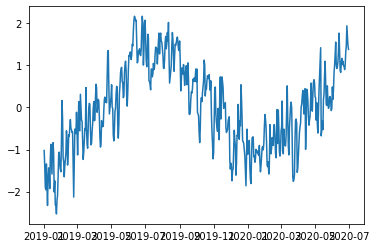

In [30]:
X = df[[df.columns[2]]]
y = df[[df.columns[5]]]
plt.plot(X,y)
plt.show()

In [31]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(y, order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
prediction_temp = []

for k in range(0,7):
    yhat = model_fit.predict(len(y)+k, len(y)+k)
    prediction_temp.append(yhat)
print(prediction_temp)

/home/justyna/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/justyna/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/home/justyna/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


ValueError: Length of passed values is 2, index implies 1.

In [32]:
def predict_temp(df):
    #TO DO
    X = df[[df.columns[2]]
    for i in range(0,6):
        y = df[[df.columns[5+i]]

    return 

SyntaxError: invalid syntax (<ipython-input-32-957a46a64ddd>, line 4)

In [90]:
X = df[[df.columns[5],df.columns[6],df.columns[7],df.columns[8],df.columns[9],df.columns[10]]]
y = df[[df.columns[13]]]

In [91]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X,y,test_size=0.2,random_state=75)

Model SVN 

In [66]:
clf= svm.SVC(kernel='linear', C=1.0)
clf.fit(Xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
ypred = clf.predict(Xtest)
clf_score = clf.score(Xtest,ytest)

In [68]:
clf_score

0.7727272727272727

In [69]:
confusion_matrix(ytest,ypred)

array([[55, 14],
       [11, 30]])

Model logistic regresion

In [70]:
logistic_regression= LogisticRegression()
logistic_regression.fit(Xtrain,ytrain)
y_pred_r=logistic_regression.predict(Xtest)
    
accur = accuracy_score(ytest, y_pred_r)

In [71]:
accur

0.7636363636363637

In [72]:
confusion_matrix(ytest,y_pred_r)

array([[56, 13],
       [13, 28]])

Model KNN

In [73]:
knn = KNeighborsClassifier()

In [74]:
knn.fit(Xtrain, ytrain)
y_pred_knn = knn.predict(Xtest)
accurKNN = accuracy_score(ytest, y_pred_knn)

In [75]:
accurKNN

0.8090909090909091

In [76]:
confusion_matrix(ytest,y_pred_knn)

array([[59, 10],
       [11, 30]])